In [1]:
# check installed version
import pycaret
pycaret.__version__

'3.0.2'

In [2]:
import pandas as pd
import os

base_dir = "../../Data"
base_csv_path = os.path.join(base_dir, 'base_cleaned.csv')
assert os.path.exists(base_csv_path), f"base {base_csv_path} does not exist"

# Load the data
df = pd.read_csv(base_csv_path)

In [3]:
#Calculate the median in wl_time
median = df['wl_time'].median()

#Print the the median wainting time
print("The median waiting time is: ", median)

#Code wl_time to 0 if it is less than the median, otherwise 1
df['wl_time'] = df['wl_time'].apply(lambda x: 0 if x < median else 1)

The median waiting time is:  88.0


In [4]:
df.sample(5)

,thoracic_dgn,num_prev_tx,tah,vas,onvent,icu,inotropic,gender,abo,wgt_kg_tcr,...,prior_card_surg_tcr,histry_cig_old,init_stat,init_age,ethcat,init_hgt_cm_calc,init_wgt_kg_calc,ventilator_tcr,work_income_tcr,wl_time
58429,1.0,0,NaN,NaN,NaN,NaN,NaN,M,2,66.2250,...,Y,NaN,3.0,51.0,5,170.18,66.2250,0,N,1
4910,1.0,0,NaN,NaN,NaN,NaN,NaN,F,1,49.0000,...,U,NaN,1.0,24.0,1,169.00,49.0000,0,N,0
38943,1.0,0,NaN,NaN,NaN,NaN,NaN,M,1,110.9000,...,N,NaN,3.0,47.0,2,180.34,110.9000,0,N,1
22421,1.0,0,NaN,NaN,NaN,NaN,NaN,F,4,52.1631,...,U,NaN,3.0,53.0,1,160.02,52.1631,0,NaN,1
60331,1.0,0,NaN,NaN,NaN,NaN,NaN,F,4,78.4000,...,N,NaN,2.0,55.0,2,157.48,78.4000,0,N,0


In [5]:
# import pycaret classification and init setup
from pycaret.classification import *
#Use setup with missforest imputation
best = setup(data = df, target = 'wl_time', imputation_type='iterative', normalize=True)

,Description,Value
0,Session id,2058
1,Target,wl_time
2,Target type,Binary
3,Original data shape,"(65067, 34)"
4,Transformed data shape,"(65067, 44)"
5,Transformed train set shape,"(45546, 44)"
6,Transformed test set shape,"(19521, 44)"
7,Ordinal features,7
8,Numeric features,21
9,Categorical features,12


In [6]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.7003,0.7653,0.7167,0.6952,0.7058,0.4005,0.4008,10.9920
gbc,Gradient Boosting Classifier,0.6994,0.7650,0.7181,0.6935,0.7056,0.3988,0.3991,2.7850
lightgbm,Light Gradient Boosting Machine,0.6982,0.7643,0.7118,0.6942,0.7029,0.3964,0.3966,1.2920
ada,Ada Boost Classifier,0.6955,0.7590,0.7135,0.6899,0.7015,0.3909,0.3912,1.5040
xgboost,Extreme Gradient Boosting,0.6909,0.7546,0.7047,0.6871,0.6958,0.3818,0.3820,2.4640
rf,Random Forest Classifier,0.6894,0.7503,0.6924,0.6895,0.6909,0.3788,0.3788,2.1550
lr,Logistic Regression,0.6839,0.7436,0.7048,0.6778,0.6910,0.3677,0.3680,13.5260
ridge,Ridge Classifier,0.6838,0.0000,0.7087,0.6763,0.6921,0.3674,0.3679,0.9350
lda,Linear Discriminant Analysis,0.6838,0.7435,0.7087,0.6763,0.6921,0.3675,0.3679,1.1430
et,Extra Trees Classifier,0.6796,0.7400,0.6794,0.6810,0.6802,0.3592,0.3592,2.2520


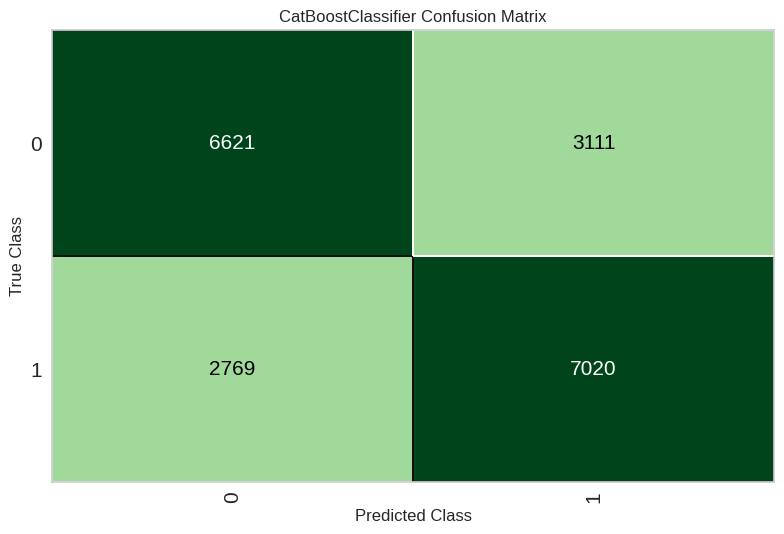

In [7]:
plot_model(best, plot = 'confusion_matrix')

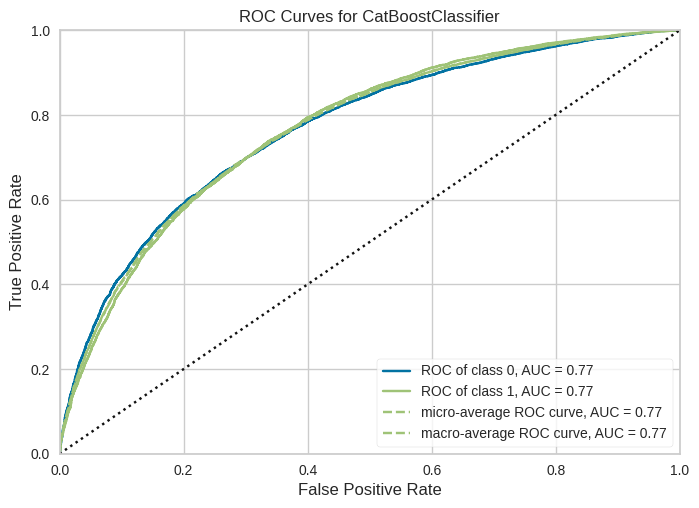

In [8]:
plot_model(best, plot = 'auc')

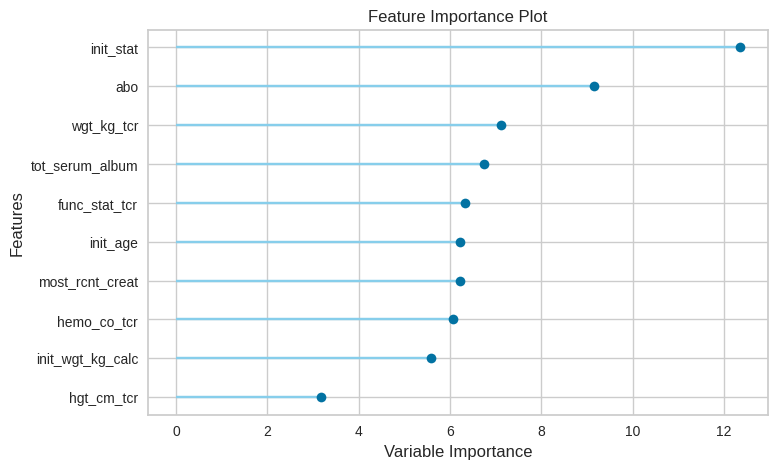

In [9]:
plot_model(best, plot = 'feature')

In [ ]:
from pycaret.classification import *

gb = create_model('gbc')

In [ ]:
plot_model(gb, plot = 'feature')